<a href="https://colab.research.google.com/github/CrasCris/MachineLearning/blob/main/Modelo_Clasificaci%C3%B3n_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Clasificación Múltiple**

Se presentan varios modelos para abordar un problema de clasificación múltiple.

**Contexto**: Utilizando datos disponibles de Colombia, específicamente la base de datos de estudiantes inscritos en programas de educación superior, el objetivo es clasificar a los estudiantes utilizando como variables independientes su género y estrato socioeconómico. Aunque existen otras columnas en nuestro conjunto de datos, hemos optado por un modelo parsimonioso, priorizando la simplicidad.

Para llevar a cabo nuestros modelos, emplearemos diversas bibliotecas, incluyendo **Scikit-Learn, TensorFlow y Keras**. Además, acompañaremos el código con comentarios explicativos para facilitar su comprensión y legibilidad. Agradecemos cualquier comentario, sugerencia o aporte, ya que serán recibidos de la mejor manera.

# **Multiple Classification Models**

We present several models to address a multiple classification problem.

**Context**: Using available data from Colombia, specifically the database of students enrolled in higher education programs, the aim is to classify students using their gender and socio-economic stratum as independent variables. Although there are other columns in our dataset, we have opted for a parsimonious model, prioritizing simplicity.

To implement our models, we will use various libraries, including **Scikit-Learn, TensorFlow, and Keras**. Furthermore, we will accompany the code with explanatory comments to facilitate understanding and readability. We welcome any comments, suggestions, or contributions, as they will be greatly appreciated.


***Create By: Cristian Diaz***

In [142]:
#Libraries
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import scipy as sc
import tensorflow as tf

In [143]:
import requests
import pandas as pd
from io import StringIO

#Leer los archivos de la API
URL = 'https://www.datos.gov.co/resource/89us-fxi5.csv?$query=SELECT%0A%20%20%60vigencia%60%2C%0A%20%20%60estrato%60%2C%0A%20%20%60tipo%60%2C%0A%20%20%60genero%60%2C%0A%20%20%60estado_civil%60%2C%0A%20%20%60nacionalidad%60%2C%0A%20%20%60depa_proce_colegio%60%2C%0A%20%20%60ciudad_proce_colegio%60%2C%0A%20%20%60depa_resi%60%2C%0A%20%20%60ciudad_resi%60%2C%0A%20%20%60facultad%60%2C%0A%20%20%60programa%60%2C%0A%20%20%60modalidad%60%2C%0A%20%20%60metodologia%60%2C%0A%20%20%60jornada%60%2C%0A%20%20%60sede%60'

df = pd.read_csv(StringIO(requests.get(URL).text))

In [144]:
df=df.drop(columns=['ciudad_resi','vigencia', 'tipo','jornada','sede','modalidad','metodologia','nacionalidad','depa_proce_colegio','ciudad_proce_colegio', 'depa_resi','programa','estado_civil'])


In [4]:
df.columns #Nombre de la columna
df['genero'].unique() # Valores unicos de cada columna

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras

# Supongamos que tienes un DataFrame llamado 'clientes' con las características mencionadas

# Preprocesamiento de datos
# Codifica las características categóricas (genero, facultad)
le_genero = LabelEncoder()
df['genero'] = le_genero.fit_transform(df['genero'])

le_facultad = LabelEncoder()
df['facultad'] = le_facultad.fit_transform(df['facultad'])

In [6]:
df

,estrato,genero,facultad
0,2,1,0
1,1,1,0
2,2,1,0
3,3,1,0
4,3,1,0
...,...,...,...
995,3,0,2
996,5,0,2
997,1,0,2
998,1,0,2


In [146]:
#Dividir el conjunto de entrenamiento y testing
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [147]:
#Escalando la variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
#Creando el modelo
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [149]:
#Matriz de confusion y porcentaje de precision
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #Precision del 54%, dado que su precision no es mayor que el 60% entonces no se deberia tomar este modelo de Maquina de Soporte Vectorial

[[ 0 14 12]
 [ 0 61 49]
 [ 0 40 74]]


0.54

In [63]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization,Dropout
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [41]:
#Mezclar la da data
df = df.sample(frac=1)
df

,estrato,genero,facultad
128,3,FEMENINO,FACULTAD DE CIENCIAS AGROINDUSTRIALES
454,1,MASCULINO,FACULTAD DE CIENCIAS BASICAS Y TECNOLOGIAS
147,3,MASCULINO,FACULTAD DE CIENCIAS BASICAS Y TECNOLOGIAS
357,2,FEMENINO,FACULTAD DE CIENCIAS BASICAS Y TECNOLOGIAS
986,1,FEMENINO,FACULTAD DE CIENCIAS DE LA SALUD
...,...,...,...
715,1,FEMENINO,FACULTAD DE CIENCIAS DE LA SALUD
820,2,MASCULINO,FACULTAD DE CIENCIAS DE LA SALUD
629,3,FEMENINO,FACULTAD DE CIENCIAS DE LA SALUD
674,2,FEMENINO,FACULTAD DE CIENCIAS DE LA SALUD


In [51]:
#Dividir el conjunto de prueba y de testeo
train_dataset, temp_test_Dataset = train_test_split(df,test_size=0.2)

In [52]:
train_dataset

,estrato,genero,facultad
960,3,1,2
276,1,1,1
531,3,0,1
544,2,0,1
974,2,1,2
...,...,...,...
350,1,1,1
77,1,1,0
896,4,1,2
523,1,0,1


In [53]:
train_stats = train_dataset.describe()
train_stats.pop("estrato")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
genero,800.0,0.45125,0.497929,0.0,0.0,0.0,1.0,1.0
facultad,800.0,1.30000,0.695057,0.0,1.0,1.0,2.0,2.0


In [54]:
#Forma de los conjuntos de datos
print(train_dataset.shape)
print(temp_test_Dataset.shape)

(800, 3)
(200, 3)


In [55]:
#Dividir el conjunto de test en 50% y 50% validacion
test_dataset, valid_dataset = train_test_split(temp_test_Dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(100, 3)
(100, 3)


In [56]:
print(f"Mostrar el tipo de dato de conjunto de prueba:  {type(test_dataset)}")
print(f"Conjunto de entrenamiento             : {train_dataset.shape}")
print(f"Conjunto de prueba                    : {test_dataset.shape}")
print(f"Conjunto de validacion                : {valid_dataset.shape}")

Mostrar el tipo de dato de conjunto de prueba:  <class 'pandas.core.frame.DataFrame'>
Conjunto de entrenamiento             : (800, 3)
Conjunto de prueba                    : (100, 3)
Conjunto de validacion                : (100, 3)


In [57]:
train_labels1 = train_dataset.pop('estrato')
test_labels1 = test_dataset.pop('estrato')
valid_labels1 = valid_dataset.pop('estrato')

In [58]:
#Codificando las etiquetas
train_labels = pd.get_dummies(train_labels1,prefix ='Label')
valid_labels = pd.get_dummies(valid_labels1 , prefix = 'Label')
test_labels = pd.get_dummies(test_labels1 , prefix = 'Label')

In [59]:
#Normalizando el conjunto de datos
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
#Mostrando un ejemplo de los datos despues de estar normalizados
normed_train_data.head(10)

In [75]:
normed_valid_dataset.shape

(100, 2)

In [134]:
#Construyendo el modelo
def build_model1_two_hidden_layers():
  model = Sequential() #OJO con las dimensiones de las neuronas dado que no utilizamos una capa plana
  model.add(Dense(40,activation='relu',input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(5,activation='softmax'))
  learning_rate=0.0001
  optimizer = optimizers.Adam(learning_rate)
  model.compile(loss ='categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])
  return model

EPOCHS = 50
batch_size = 100
model = build_model1_two_hidden_layers()
print('Aqui el resumen del modelo: ')
model.summary()

with tf.device('/CPU:0'):
  history = model.fit(
      normed_train_data,
      train_labels,
      batch_size=batch_size,
      epochs=EPOCHS,
      verbose=1,
      shuffle=True,
      steps_per_epoch= int(normed_train_data.shape[0]/batch_size),
      validation_data = (normed_valid_dataset, valid_labels),
  )

Aqui el resumen del modelo: 
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 40)                120       
                                                                 
 dense_122 (Dense)           (None, 30)                1230      
                                                                 
 dense_123 (Dense)           (None, 20)                620       
                                                                 
 dense_124 (Dense)           (None, 10)                210       
                                                                 
 dense_125 (Dense)           (None, 5)                 55        
                                                                 
Total params: 2235 (8.73 KB)
Trainable params: 2235 (8.73 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________

In [102]:
print('Resumen del modelo despues de cada epoca: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Resumen del modelo despues de cada epoca: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,1.502276,0.36875,1.499306,0.32,95
96,1.500727,0.36875,1.497645,0.32,96
97,1.499032,0.36875,1.495964,0.32,97
98,1.497492,0.36875,1.494227,0.32,98
99,1.495764,0.36875,1.492644,0.32,99


In [103]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 96ms/step
predicted values: 


array([[0.22886261, 0.22214216, 0.19421993, 0.17205201, 0.18272318],
       [0.24540722, 0.2921845 , 0.16835083, 0.17048883, 0.1235688 ],
       [0.2421894 , 0.2569368 , 0.16741328, 0.18758628, 0.14587428],
       [0.24540722, 0.2921845 , 0.16835083, 0.17048883, 0.1235688 ],
       [0.27923924, 0.23402646, 0.14357081, 0.16146265, 0.18170087],
       [0.22886261, 0.22214216, 0.19421993, 0.17205201, 0.18272318],
       [0.22886261, 0.22214216, 0.19421993, 0.17205201, 0.18272318],
       [0.251936  , 0.27382463, 0.16729996, 0.14696784, 0.15997161],
       [0.26446265, 0.35326084, 0.13824701, 0.13330667, 0.11072288],
       [0.22886263, 0.22214217, 0.19421995, 0.17205203, 0.18272321]],
      dtype=float32)

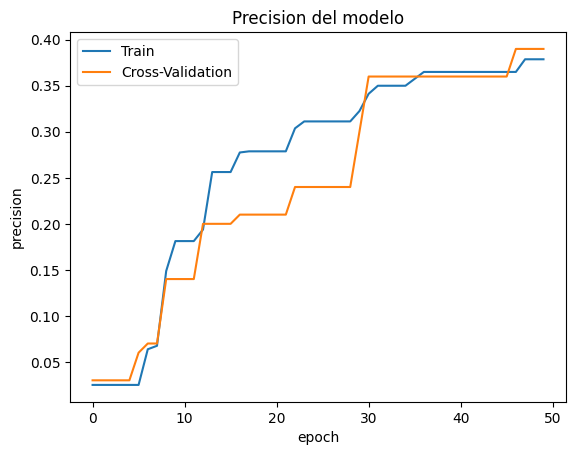

In [135]:
#Ver como fue el entrenamiento
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper left')
plt.show()
# Mala precision menos del 40%

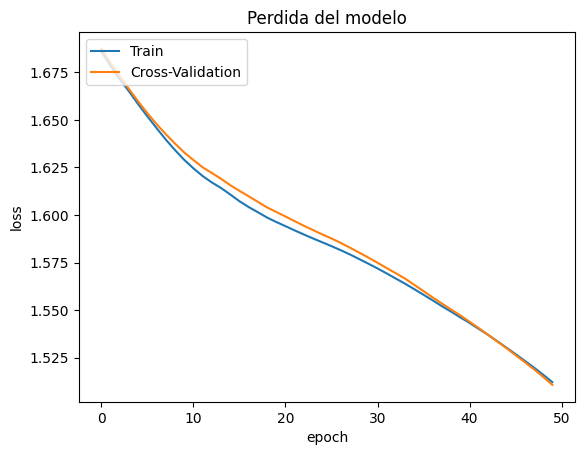

In [136]:
#Ver como fue el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper left')
plt.show()
#No disminuye lo suficiente hacia cero

In [137]:
print('Train Split')
loss,accuracy=model.evaluate(normed_train_data , train_labels, verbose=1)
print("Precision : {:5.2f} ".format(accuracy))

Train Split
25/25 [==============================] - 1s 4ms/step - loss: 1.5099 - accuracy: 0.3787
Precision :  0.38 


In [140]:
print('Evaluation Split')
loss,accuracy=model.evaluate(normed_valid_dataset , valid_labels, verbose=2)
print("Precision : {:5.2f} ".format(accuracy))

Evaluation Split
4/4 - 0s - loss: 1.5106 - accuracy: 0.3900 - 54ms/epoch - 14ms/step
Precision :  0.39 


In [141]:
print('Test Split')
loss,accuracy=model.evaluate(normed_test_data , test_labels, verbose=2)
print("Precision : {:5.2f} ".format(accuracy)) #50% de precision a la hora de predecir ;-;

Test Split
4/4 - 0s - loss: 1.4959 - accuracy: 0.5000 - 32ms/epoch - 8ms/step
Precision :  0.50 


In [216]:
#Se propone un tercer modelo simplificado
model1=Sequential()
model1.add(Dense(64,activation="relu",input_dim=2))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(16,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [217]:
model1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [219]:
#ajustando el modelo
historial = model1.fit(X,y,batch_size=5,epochs=150)

Epoch 1/150
200/200 [==============================] - 1s 5ms/step - loss: -986914.3750 - accuracy: 0.4300
Epoch 2/150
200/200 [==============================] - 1s 5ms/step - loss: -1228550.7500 - accuracy: 0.4300
Epoch 3/150
200/200 [==============================] - 1s 4ms/step - loss: -1504309.0000 - accuracy: 0.4300
Epoch 4/150
200/200 [==============================] - 1s 3ms/step - loss: -1818992.0000 - accuracy: 0.4300
Epoch 5/150
200/200 [==============================] - 1s 4ms/step - loss: -2175038.2500 - accuracy: 0.4300
Epoch 6/150
200/200 [==============================] - 1s 5ms/step - loss: -2582743.0000 - accuracy: 0.4300
Epoch 7/150
200/200 [==============================] - 1s 5ms/step - loss: -3043477.7500 - accuracy: 0.4300
Epoch 8/150
200/200 [==============================] - 1s 4ms/step - loss: -3544370.7500 - accuracy: 0.4300
Epoch 9/150
200/200 [==============================] - 1s 4ms/step - loss: -4092627.0000 - accuracy: 0.4300
Epoch 10/150
200/200 [=======

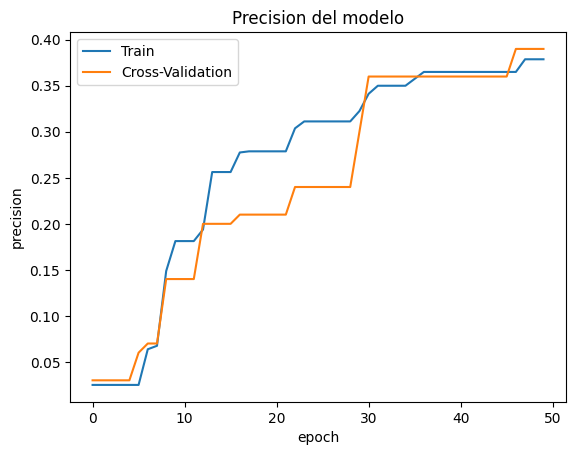

In [220]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper left')
plt.show()